## E-commerce: Identificar os perfis dos consumidores

### Segmente usuários com base em seus perfis de consumidor.

- Realize a análise exploratória de dados.
- Segmente os usuários com base no histórico de compras. Sinta-se à vontade para implementar suas próprias ideias para segmentar usuários. Pense em como a segmentação pode ajudar você a desenvolver ofertas mais personalizadas para diferentes usuários. Tente formar segmentos com base no que os usuários compram. Você pode analisar suas compras e segmentar as mercadorias de acordo com a categoria de produto a que pertencem.
- Formule e teste hipóteses estatísticas.

Para trabalhar com os dados em questão, além de entender a demanda, e a necessidade, irei sugerir alguns procedimentos que poderão ser seguidos, até conseguirmos extrair insights para solução do problema:

## 1º Parte: Entendendo a demanda e os dados

#### Nesta primeira parte o principal objetivo é entender a demanda e verificar os dados, para isso, inicialmente teremos que:
   - ler os arquivos - OK
   - Visualização geral dos dados com métodos info(), describe(), shape() - OK
   - Verificar e entender que tipo de dados estamos trabalhando, e se necessitam de algum ajuste de formato - OK
   - Verificar se existem valores ausentes, - OK
   - Verificar se existem duplicados (explicítos e implicítos), - OK
   - Verificar o nome das colunas e se existem anômalias, como por exemplo iníciais maiúsculas e minúsculas da mesma palavra - OK
   - Medidas e Ferramentas para tratar tais anômalias. - OK
   - Verificar se existe mais algum dado inconsistente e que necessite de ajuste. - OK

In [141]:
# lendo os arquivos:
import pandas as pd
ecommerce = pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep='\t')
print(ecommerce.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID  
0  11/29/2018 08:26       2.55     17850.0  
1  11/29/2018 08:26       3.39     17850.0  
2  11/29/2018 08:26       2.75     17850.0  
3  11/29/2018 08:26       3.39     17850.0  
4  11/29/2018 08:26       3.39     17850.0  


In [142]:
print(ecommerce.shape)

(541909, 7)


In [143]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


<div class="alert alert-block alert-info">
<b>Resposta do Aluno:Foram colocados comentários no final da etapa, nesse caso é possível visualizar todas as colunas do dataframe, podemos ver a quantidade de valores não nulos em cada coluna, e também o Dtype de cada coluna, no decorrer do projeto verá que algumas colunas foram transformadas para atender a necessidade da análise, e também foram tratados os valores nulos que estão nas colunas 'CustumerID' e 'Description'.  </b> <a class="tocSkip"></a>
</div>

In [144]:
ecommerce.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


<div class="alert alert-block alert-info">
<b>Resposta do Aluno:  Este método esta mostrando previamente um resumo de todas as colunas 'númericas' do dataframe, vemos valores máximos, mínimos e as médias para ter noção da proporção dos dados, lembrando que nesse caso nem tudo pode ser levado em consideração visto que a coluna 'CustomerID' não tem lógica, visto que são números identificadores, no decorrer do projeto verá que a mesma será transformada em string para poder ser melhor aproveitada.</b> <a class="tocSkip"></a>
</div>

In [145]:
# Padronizando as colunas e os nomes com o método lower():

ecommerce.columns = ecommerce.columns.str.lower()
print(ecommerce.head(2))
print()
ecommerce['description'] = ecommerce['description'].str.lower()
print(ecommerce.head(2))

  invoiceno stockcode                         description  quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   

        invoicedate  unitprice  customerid  
0  11/29/2018 08:26       2.55     17850.0  
1  11/29/2018 08:26       3.39     17850.0  

  invoiceno stockcode                         description  quantity  \
0    536365    85123A  white hanging heart t-light holder         6   
1    536365     71053                 white metal lantern         6   

        invoicedate  unitprice  customerid  
0  11/29/2018 08:26       2.55     17850.0  
1  11/29/2018 08:26       3.39     17850.0  


In [146]:
# transformando os dados em datetime

ecommerce['invoicedate'] = pd.to_datetime(ecommerce['invoicedate'])

In [147]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    541909 non-null  object        
 1   stockcode    541909 non-null  object        
 2   description  540455 non-null  object        
 3   quantity     541909 non-null  int64         
 4   invoicedate  541909 non-null  datetime64[ns]
 5   unitprice    541909 non-null  float64       
 6   customerid   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 28.9+ MB


<div class="alert alert-block alert-info">
<b>Resposta do Aluno: Estou conferindo o Dtype da coluna 'invoicedate', na linha de código acima a mesma foi transformada para datetime, anteriormente estava como type 'object'.  </b> <a class="tocSkip"></a>
</div>

In [148]:
# verificando os valores ausentes:

print(ecommerce['description'].isna().sum())

print(ecommerce['customerid'].isna().sum())

1454
135080


<div class="alert alert-block alert-info">
<b>Resposta do Aluno: Foi utilizado a combinação dos métodos isna, e sum para ver a quantidade de valores nulos.. podemos concluir que existe uma quantidade considerável de valores nulos na coluna 'customerid'. </b> <a class="tocSkip"></a>
</div>

In [149]:
# verificando as linhas totalmente duplicadas.
print(ecommerce[ecommerce.duplicated()])

       invoiceno stockcode                        description  quantity  \
517       536409     21866        union jack flag luggage tag         1   
527       536409     22866      hand warmer scotty dog design         1   
537       536409     22900    set 2 tea towels i love london          1   
539       536409     22111       scottie dog hot water bottle         1   
555       536412     22327  round snack boxes set of 4 skulls         1   
...          ...       ...                                ...       ...   
541675    581538     22068        black pirate treasure chest         1   
541689    581538     23318     box of 6 mini vintage crackers         1   
541692    581538     22992             revolver wooden ruler          1   
541699    581538     22694                       wicker star          1   
541701    581538     23343       jumbo bag vintage christmas          1   

               invoicedate  unitprice  customerid  
517    2018-11-29 11:45:00       1.25     17908

<div class="alert alert-block alert-info">
<b>Resposta do Aluno: Foi utilizado o método duplicated para visualizar todas as linhas 100% duplicadas, ou seja mesmo número de pedido, mesmo horário de compra, mesmo cliente, etc... ao todo foram identificadas 5268 linhas totalmente duplicadas, que se não tratadas, poderam influenciar negativamente a análise.   </b> <a class="tocSkip"></a>
</div>

In [150]:
# eliminando linhas totalmente duplicadas:

ecommerce = ecommerce.drop_duplicates()

In [151]:
print(ecommerce.duplicated().sum())

0


In [152]:
# transformando dados float em int:

# substituindo Nan's:
ecommerce['customerid'] = ecommerce['customerid'].fillna(0)  # Substituir nulos por 0


ecommerce['customerid'] = ecommerce['customerid'].astype(int)
print(ecommerce.head())

  invoiceno stockcode                          description  quantity  \
0    536365    85123A   white hanging heart t-light holder         6   
1    536365     71053                  white metal lantern         6   
2    536365    84406B       cream cupid hearts coat hanger         8   
3    536365    84029G  knitted union flag hot water bottle         6   
4    536365    84029E       red woolly hottie white heart.         6   

          invoicedate  unitprice  customerid  
0 2018-11-29 08:26:00       2.55       17850  
1 2018-11-29 08:26:00       3.39       17850  
2 2018-11-29 08:26:00       2.75       17850  
3 2018-11-29 08:26:00       3.39       17850  
4 2018-11-29 08:26:00       3.39       17850  


#### Resposta do aluno:

*foram identificados dados ausentes nas colunas 'Description' e 'CustomerId', além da necessidade de transformar os dados da coluna 'InvoiceDate' para datetime, e tambem a padronização com método str.lower nos dados da coluna 'Description', linhas totalmente duplicadas identificadas e eliminadas do dataframe., tambem foi ajustado os dados da coluna 'customerid'*

### 2º Parte: Realizando a Análise Exploratória dos Dados:

#### Como o objetivo é entender e identificar o perfil dos consumidores, podemos explorar alguns dados:
##### Para Análise Temporal:
- Limpar os dados e identificar outliers que possam distorcer a análise. - OK
- Verificar se existem clientes inativos. - OK
- Identificar usuários que não realizaram compras recentes para entender o comportamento geral dos clientes. - OK
- Verificar a frequência de compras dos clientes. - OK
- Analisar quantas vezes os clientes compram para categorizar comportamentos. - OK
- Descobrir o período das compras por cliente. - OK
- Entender os ciclos de compra para identificar padrões sazonais ou temporais. - OK
- Descobrir o intervalo de compra entre pedidos do mesmo cliente.- OK
- Determinar a consistência ou irregularidade nas compras dos clientes.- OK

In [153]:
# Verificando o período de compras dos clientes:

print(ecommerce['invoicedate'].min())
print(ecommerce['invoicedate'].max())

2018-11-29 08:26:00
2019-12-07 12:50:00


In [154]:
# Verificando os pedidos por clientes:

print(ecommerce.groupby('customerid')['invoiceno'].count())

customerid
0        135037
12346         2
12347       182
12348        31
12349        73
          ...  
18280        10
18281         7
18282        13
18283       721
18287        70
Name: invoiceno, Length: 4373, dtype: int64


<div class="alert alert-block alert-info">
<b>Resposta do Aluno: Código útil, porque agrupa os dados por código de usuário, e confirma os valores NaN que foram substituídos por 0 (zero) anteriormente.  </b> <a class="tocSkip"></a>
</div>

In [155]:
# Eliminando Discrepâncias, eliminando usuários '0' (Não identificados) ou Inativos, para não influenciar a análise:

ecommerce = ecommerce[ecommerce['customerid'] != 0]

# Verificando os dados
print(ecommerce.groupby('customerid')['invoiceno'].count())


customerid
12346      2
12347    182
12348     31
12349     73
12350     17
        ... 
18280     10
18281      7
18282     13
18283    721
18287     70
Name: invoiceno, Length: 4372, dtype: int64


In [156]:
# Verificando pedidos por cliente juntamente com as datas do primeiros e ultimos pedidos:

customer_order = ecommerce.groupby('customerid').agg({
    'invoiceno': 'count', 
    'invoicedate': ['min', 'max']
})

# Verificando os dias contados entre ambas as datas, para verificar a data da ultima compra e intervalo
customer_order['date_range'] = customer_order[('invoicedate', 'max')] - customer_order[('invoicedate', 'min')]

print(customer_order.head())

           invoiceno         invoicedate                            date_range
               count                 min                 max                  
customerid                                                                    
12346              2 2019-01-16 10:01:00 2019-01-16 10:17:00   0 days 00:16:00
12347            182 2018-12-05 14:57:00 2019-12-05 15:52:00 365 days 00:55:00
12348             31 2018-12-14 19:09:00 2019-09-23 13:13:00 282 days 18:04:00
12349             73 2019-11-19 09:51:00 2019-11-19 09:51:00   0 days 00:00:00
12350             17 2019-01-31 16:01:00 2019-01-31 16:01:00   0 days 00:00:00


In [157]:
# Dividindo os clientes com maiores frequencias.

customer_qtd = ecommerce.groupby('customerid')['invoiceno'].count()
print(customer_qtd.sort_values(ascending=True))

# Verificando a média
print(customer_qtd.mean())

customerid
17752       1
13270       1
15668       1
18113       1
15657       1
         ... 
14606    2759
12748    4459
14096    5128
14911    5898
17841    7812
Name: invoiceno, Length: 4372, dtype: int64
91.85818847209515


In [158]:
import numpy as np

# Somando a quantidade total de pedidos por cliente
ecommerce['costumer_total'] = ecommerce.groupby('customerid')['invoiceno'].transform('count')

conditions = [
    ecommerce['costumer_total'] < 50,
    (ecommerce['costumer_total'] >= 50) & (ecommerce['costumer_total'] < 100),
    (ecommerce['costumer_total'] >= 100) & (ecommerce['costumer_total'] < 1000),
    (ecommerce['costumer_total'] >= 1000) & (ecommerce['costumer_total'] < 2000),
    ecommerce['costumer_total'] >= 2000
]

# Definindo os valores correspondentes às condições
categories = ['very litle freq', 'litle freq.', 'medium freq', 'high freq', 'Top freq']

# Criando a coluna de ranking para classificar os clientes
ecommerce['customer_rank'] = np.select(conditions, categories, default='Sem Categoria')
print(ecommerce.head())
print()

# Verificando a quantidade de clientes em cada nível:
print('Quantidade de clientes em cada nível (frequência de pedidos):')
print(ecommerce['customer_rank'].value_counts())

  invoiceno stockcode                          description  quantity  \
0    536365    85123A   white hanging heart t-light holder         6   
1    536365     71053                  white metal lantern         6   
2    536365    84406B       cream cupid hearts coat hanger         8   
3    536365    84029G  knitted union flag hot water bottle         6   
4    536365    84029E       red woolly hottie white heart.         6   

          invoicedate  unitprice  customerid  costumer_total customer_rank  
0 2018-11-29 08:26:00       2.55       17850             309   medium freq  
1 2018-11-29 08:26:00       3.39       17850             309   medium freq  
2 2018-11-29 08:26:00       2.75       17850             309   medium freq  
3 2018-11-29 08:26:00       3.39       17850             309   medium freq  
4 2018-11-29 08:26:00       3.39       17850             309   medium freq  

Quantidade de clientes em cada nível (frequência de pedidos):
medium freq        240131
litle freq.     

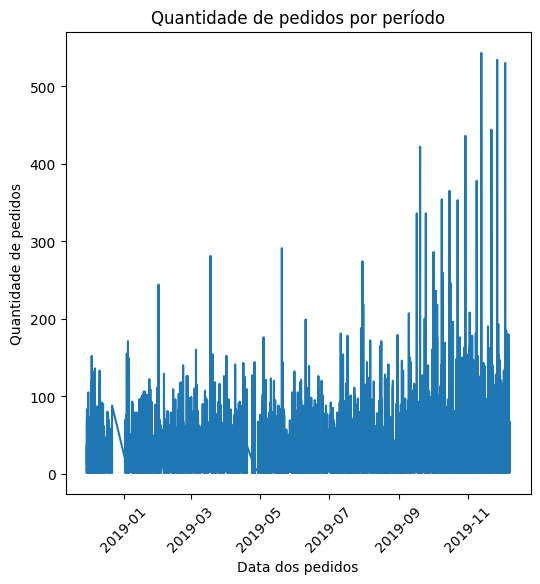

In [159]:
# Realizando um gráfico 

import matplotlib.pyplot as plt

ecommerce_date = ecommerce.groupby('invoicedate')['invoiceno'].count()

plt.figure(figsize=(6, 6))
plt.plot(ecommerce_date.index, ecommerce_date.values)
plt.xlabel('Data dos pedidos')
plt.ylabel('Quantidade de pedidos')
plt.title('Quantidade de pedidos por período')
plt.xticks(rotation=45)
plt.show()

#### Resposta do aluno:
*Com o gráfico acima podemos perceber o consumo durante o período, valores atípicos já foram eliminados para não interferir no estudo, e tambem podemos perceber sazonalidade*

##### Para Análise Relacionada ao Produto:
- Verificar quais produtos são os mais vendidos e quais são os menos vendidos. - OK
- Analisar a performance de produtos para começar a identificar categorias relevantes. - OK
- Valor total por cliente. - OK
- Calcular o total gasto por cliente para entender a contribuição financeira de cada grupo. - OK

In [160]:
# Verificando os itens mais vendidos:
print(ecommerce['description'].value_counts())

white hanging heart t-light holder     2058
regency cakestand 3 tier               1894
jumbo bag red retrospot                1659
party bunting                          1409
assorted colour bird ornament          1405
                                       ... 
silver/crystal drop earrings w leaf       1
doorknob ceramic ivory                    1
orange flower mug                         1
heavens scent fragrance oils asstd        1
ruby glass cluster necklace               1
Name: description, Length: 3896, dtype: int64


In [161]:
# Criando uma nova coluna para o total de vendas (quantity * unitprice)
ecommerce['total_sales'] = ecommerce['quantity'] * ecommerce['unitprice']

# Agrupando por produto e somando as vendas totais
total_sales = ecommerce.groupby('description')['total_sales'].sum()

# Exibindo os resultados
print(total_sales.sort_values(ascending=False).head(10))


description
regency cakestand 3 tier              132567.70
white hanging heart t-light holder     93767.80
jumbo bag red retrospot                83056.52
party bunting                          67628.43
postage                                66710.24
assorted colour bird ornament          56331.91
rabbit night light                     51042.84
chilli lights                          45915.41
paper chain kit 50's christmas         41423.78
picnic basket wicker 60 pieces         39619.50
Name: total_sales, dtype: float64


In [162]:
# Existem quantidades negativas na coluna 'quantity' que para uma eventual analise grafica irá interferir. exemplo:
print(ecommerce['quantity'].min())

-80995


In [163]:
# Verificando type da coluna quantity:
print(ecommerce['quantity'].dtype)

int64


In [164]:
# Convertendo para númerico:
ecommerce['quantity'] = pd.to_numeric(ecommerce['quantity'], errors='coerce')

In [165]:
# Verificando valor total gasto por clientes:

# Antes, eliminando valores negativos em quantity:
ecommerce = ecommerce[ecommerce['quantity'] >= 0]

# Convertendo para string
ecommerce['customerid'] = ecommerce['customerid'].astype(str)

customer_total = ecommerce.groupby('customerid')['total_sales'].sum()

# Verificando os clientes que mais gastaram
print('Clientes que mais consumiram (Valor)')
print(customer_total.sort_values(ascending=False).head(10))

Clientes que mais consumiram (Valor)
customerid
14646    280206.02
18102    259657.30
17450    194390.79
16446    168472.50
14911    143711.17
12415    124914.53
14156    117210.08
17511     91062.38
16029     80850.84
12346     77183.60
Name: total_sales, dtype: float64


In [166]:
# Verificando a contruibuição financeira de cada grupo:

total_group = ecommerce.groupby('customer_rank')['total_sales'].sum()
total_group = total_group.astype(int)

print('Grupos que mais arrecadaram:')
print(total_group.sort_values(ascending=False))

Grupos que mais arrecadaram:
customer_rank
medium freq        5022238
very litle freq    1647933
litle freq.        1147188
Top freq            635363
high freq           434484
Name: total_sales, dtype: int64


#### Resposta do aluno:
*Podemos ver que o grupo de clientes que compra com muita frequência, não é de longe o grupo com maior gasto, ou seja os clientes categorizados em média frequência de compras, são responsáveis pelo maior faturamento da empresa, seguindo pelos muito pouca frequência, e posteriormente pouca frequência de compra*

##### Realização de Gráficos
- Realizar gráficos para visualização de vendas por período. - OK
- Gráficos temporais para identificar tendências sazonais ou mudanças no comportamento. - OK
- Realizar gráficos de receita por produto. - OK
- Verificar a distribuição de receita entre diferentes produtos. - OK
- Realizar gráficos de receita para grupos de clientes (Podemos definir grupos conforme a frequência de compras). -OK

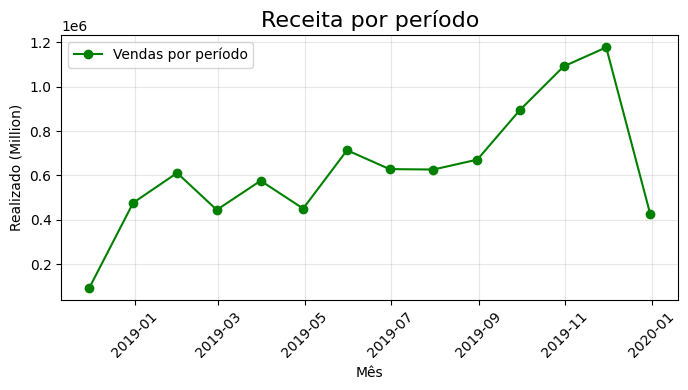

In [167]:
# Realizar gráficos para visualização de vendas por período

# Agrupando os dados por mês
ecommerce_month = ecommerce.groupby(pd.Grouper(key='invoicedate', freq='M'))['total_sales'].sum()

# gráfico
plt.figure(figsize=(7, 4))
plt.plot(ecommerce_month.index, ecommerce_month.values, marker='o', linestyle='-', color='green', label='Vendas por período')

plt.xlabel('Mês')
plt.ylabel('Realizado (Million)')
plt.title('Receita por período', fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Resposta do Aluno:CONCLUSÃO: Neste Gráfico os dados das vendas foram ordenados por mês, diferente do gráfico anterior que era mais simples e com objetivo apenas de mostrar como o consumo era distribuído, neste foi adcionado marcadores e grade, o que facilitou a visualização, o que foi possível observar um pico de vendas nos meses 11 e 12/2019, no período que antecede essa data é possível ver que as vendas oscilavam entre 400 e 650 mil, o que teve um crescimento no final do período.  </b> <a class="tocSkip"></a>
</div>

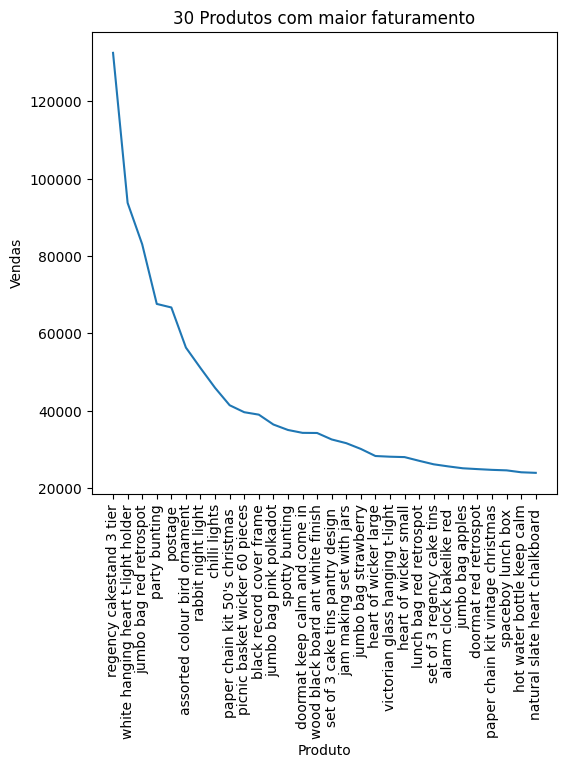

In [168]:
# Receita por produto

top_30 = total_sales.sort_values(ascending=False).head(30)

plt.figure(figsize=(6, 6))
plt.plot(top_30.index, top_30.values)
plt.xlabel('Produto')
plt.ylabel('Vendas')
plt.title('30 Produtos com maior faturamento')
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-info">
<b>Resposta do Aluno: CONCLUSÃO: O objetivo desse gráfico foi ter uma ideia visual da representatividade de cada produto no faturamento do período, nesse gráfico temos os 30 produtos mais vendidos e seus respectivos valores de venda no eixo y. nesse gráfico fica evitente que temos produtos que se sobresaem em relação aos demais. </b> <a class="tocSkip"></a>
</div>

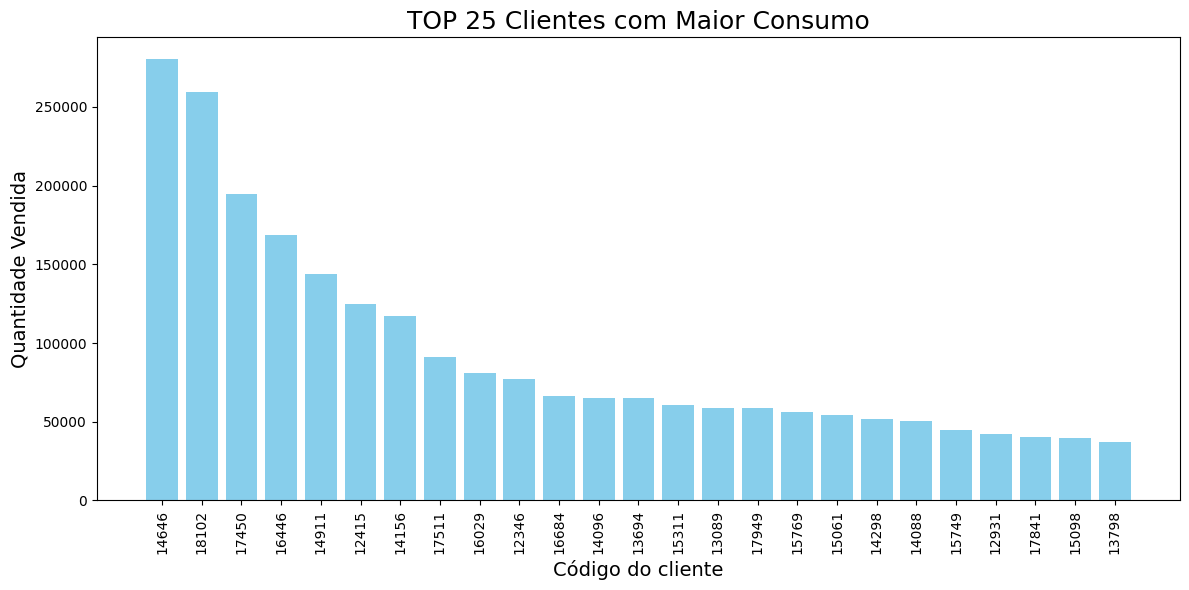

In [169]:
# Verificando a distribuição da receita por cliente

top_25 = customer_total.sort_values(ascending=False).head(25)

# gráfico
plt.figure(figsize=(12, 6))
plt.bar(top_25.index, top_25.values, color='skyblue')

plt.title('TOP 25 Clientes com Maior Consumo', fontsize=18)
plt.xlabel('Código do cliente', fontsize=14)
plt.ylabel('Quantidade Vendida', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">
<b>Resposta do Aluno: CONCLUSÃO: O objetivo desse gráfico foi ter uma ideia visual da representatividade de cada cliente no faturamento do período, lembrando que tive que transformar os dados dos códigos id dos clientes para processar o gráfico, neste gráfico também podemos observar que existem clientes que se sobresaem em relação aos demais, inclusive os mesmos foram classificados no decorrer desse projeto. </b> <a class="tocSkip"></a>
</div>

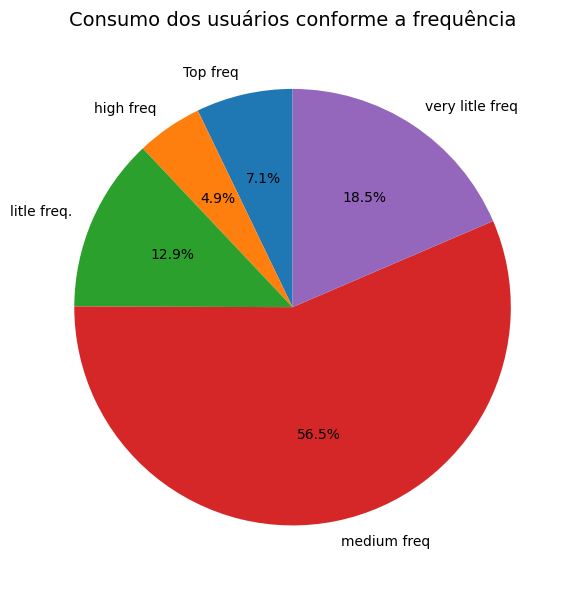

customer_rank
medium freq        5022238
very litle freq    1647933
litle freq.        1147188
Top freq            635363
high freq           434484
Name: total_sales, dtype: int64


In [170]:
# Realizar gráficos de receita para grupos de clientes conforme a frequência de compras

plt.figure(figsize=(6, 6))
plt.pie(
    total_group.values,
    labels=total_group.index,
    autopct=lambda p: f'{p:.1f}%',
    startangle=90 
)


plt.title('Consumo dos usuários conforme a frequência', fontsize=14)
plt.tight_layout()
plt.show()

print(total_group.sort_values(ascending=False))

#### Resposta do aluno:
*Podemos observar no gráfico acima que o grupo clientes que compram em uma frequência média, aproximadamente 100 vezes durante o período, representam 56% do faturamento da empresa.*

##### Análise de Grupos
- Avaliar o desempenho financeiro dos grupos definidos com base na frequência de compras. - OK
- Estabelecer métricas para separar os clientes, verificar o tipo de produto e definir por categorias, e estabelecer limiar de valores para separar os clientes (os grupos que geram mais receita e os que geram menos). - OK
- Criar categorias baseadas nos insights coletados até aqui para uma segmentação mais eficaz. - OK
- Descobrir a Taxa de Retenção. - OK
- Descobrir o LTV. - OK
- Calcular o Lifetime Value para estimar a contribuição de receita futura dos clientes. - OK


In [171]:
# Verificando os principais produtos e seu publico alvo além do faturamento

comparative = ecommerce.groupby('description').agg({'customer_rank':'count', 'total_sales': 'sum'})
print(comparative.sort_values(by='total_sales', ascending=False).head(10))

                                    customer_rank  total_sales
description                                                   
paper craft , little birdie                     1    168469.60
regency cakestand 3 tier                     1714    142264.75
white hanging heart t-light holder           2016    100392.10
jumbo bag red retrospot                      1615     85040.54
medium ceramic top storage jar                198     81416.73
postage                                      1099     77803.96
party bunting                                1390     68785.23
assorted colour bird ornament                1395     56413.03
manual                                        285     53419.93
rabbit night light                            823     51251.24


In [172]:
# foi possível identificar que o produto de maior faturamento foi adquirido por apenas um cliente.
customer_paper = ecommerce.loc[ecommerce['description'] == 'paper craft , little birdie']
print(customer_paper)

       invoiceno stockcode                  description  quantity  \
540421    581483     23843  paper craft , little birdie     80995   

               invoicedate  unitprice customerid  costumer_total  \
540421 2019-12-07 09:15:00       2.08      16446               4   

          customer_rank  total_sales  
540421  very litle freq     168469.6  


#### Resposta do aluno:
*esse cliente código id 16446 comprou apenas 1 vez contudo uma quantidade muito alta, podemos considerar como outlier*

In [173]:
# Verificando o segundo item mais vendido, este produto  esta melhor distribuido entre os consumidores.
customer_regency = ecommerce.loc[ecommerce['description'] == 'regency cakestand 3 tier']
print(customer_regency)

       invoiceno stockcode               description  quantity  \
880       536477     22423  regency cakestand 3 tier        16   
936       536502     22423  regency cakestand 3 tier         2   
1092      536525     22423  regency cakestand 3 tier         2   
1155      536528     22423  regency cakestand 3 tier         1   
1197      536530     22423  regency cakestand 3 tier         1   
...          ...       ...                       ...       ...   
538094    581397     22423  regency cakestand 3 tier         3   
538944    581425     22423  regency cakestand 3 tier         1   
539891    581449     22423  regency cakestand 3 tier         1   
540216    581472     22423  regency cakestand 3 tier         2   
541231    581495     22423  regency cakestand 3 tier        10   

               invoicedate  unitprice customerid  costumer_total  \
880    2018-11-29 12:27:00      10.95      16210             123   
936    2018-11-29 12:36:00      12.75      16552              17   
109

In [174]:
# Estabelecendo um novo padrão de filtro para classificar os clientes, 
# agora levando em consideração o faturamento como critério principal.

#faturamento total por cliente
ecommerce['total_sales_customer'] = ecommerce.groupby('customerid')['total_sales'].transform('sum')

conditions_2 = [
    ecommerce['total_sales_customer'] < 100,
    (ecommerce['total_sales_customer'] >= 100) & (ecommerce['total_sales_customer'] < 2000),
    (ecommerce['total_sales_customer'] >= 2000) & (ecommerce['total_sales_customer'] < 10000),
    (ecommerce['total_sales_customer'] >= 10000) & (ecommerce['total_sales_customer'] < 100000),
    ecommerce['total_sales_customer'] >= 100000
]

# Definindo os valores correspondentes às condições
categories_2 = ['Latão', 'Bronze', 'Prata', 'Ouro', 'Diamante']

# Criando a coluna de ranking para classificar os clientes
ecommerce['Nível'] = np.select(conditions_2, categories_2, default='Sem Categoria')

# Verificando a quantidade de clientes em cada nível:
print('Quantidade de clientes em cada nível (Receita):')
print(ecommerce.groupby('Nível').agg({'customerid': 'nunique'}).sort_values(by='Nível', ascending=False))
print()
print(customer_total.sort_values(ascending=False).head(10))

Quantidade de clientes em cada nível (Receita):
          customerid
Nível               
Prata            792
Ouro              97
Latão            159
Diamante           7
Bronze          3284

customerid
14646    280206.02
18102    259657.30
17450    194390.79
16446    168472.50
14911    143711.17
12415    124914.53
14156    117210.08
17511     91062.38
16029     80850.84
12346     77183.60
Name: total_sales, dtype: float64


#### Resposta do aluno:

*Podemos observar que agora temos uma divisão (ranqueamento) mais coerente em relação aos clientes, a frequência de compras no final acaba não sento tão importante quanto o faturamento.

In [175]:
# Calculando LTV , TAXA de Retenção
ecommerce['invoicedate'] = pd.to_datetime(ecommerce['invoicedate'])

# Cohort 1º mês:
ecommerce['first_orders_month'] = ecommerce.groupby('customerid')['invoicedate'].transform('min').dt.to_period('M')

#Verificando a quantidade de clientes para cada mês:

ecommerce['activity_month'] = ecommerce['invoicedate'].dt.to_period('M')
ecommerce['age'] = (ecommerce['activity_month'] - ecommerce['first_orders_month']).apply(lambda x: x.n)


# Calcular o LTV
# Agrupar por coorte e idade, calculando as métricas necessárias
report = ecommerce.groupby(['first_orders_month', 'age']).agg(
    gp=('total_sales', 'sum'),   # gross profit
    Uid=('customerid', 'nunique')  
).reset_index()

report['ltv'] = report['gp'] / report['Uid']
report

,first_orders_month,age,gp,Uid,ltv
0,2018-11,0,93390.06,188,496.755638
1,2018-11,1,85374.84,71,1202.462535
2,2018-11,2,70785.34,69,1025.874493
3,2018-11,3,51493.64,62,830.542581
4,2018-11,4,77176.09,68,1134.942500
...,...,...,...,...,...
100,2019-10,1,47232.45,92,513.396196
101,2019-10,2,10101.81,36,280.605833
102,2019-11,0,130466.10,306,426.359804
103,2019-11,1,5864.73,19,308.670000


In [176]:
output = report.pivot_table(
    index='first_orders_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean'
).round()

output = output.fillna(0)
output

age,0,1,2,3,4,5,6,7,8,9,10,11,12,13
first_orders_month,,,,,,,,,,,,,,
2018-11,497.0,1202.0,1026.0,831.0,1135.0,679.0,1258.0,976.0,1104.0,1263.0,1295.0,1722.0,1662.0,1259.0
2018-12,562.0,844.0,807.0,813.0,631.0,934.0,950.0,987.0,1121.0,1286.0,1279.0,1025.0,671.0,0.0
2019-01,668.0,570.0,559.0,708.0,635.0,614.0,649.0,696.0,536.0,841.0,763.0,550.0,0.0,0.0
2019-02,438.0,446.0,559.0,449.0,376.0,418.0,539.0,569.0,552.0,577.0,318.0,0.0,0.0,0.0
2019-03,429.0,434.0,551.0,466.0,513.0,588.0,545.0,693.0,581.0,263.0,0.0,0.0,0.0,0.0
2019-04,403.0,421.0,388.0,352.0,374.0,429.0,446.0,412.0,268.0,0.0,0.0,0.0,0.0,0.0
2019-05,434.0,321.0,431.0,379.0,474.0,500.0,480.0,10844.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-06,567.0,371.0,342.0,504.0,459.0,536.0,299.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-07,447.0,329.0,433.0,431.0,390.0,279.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


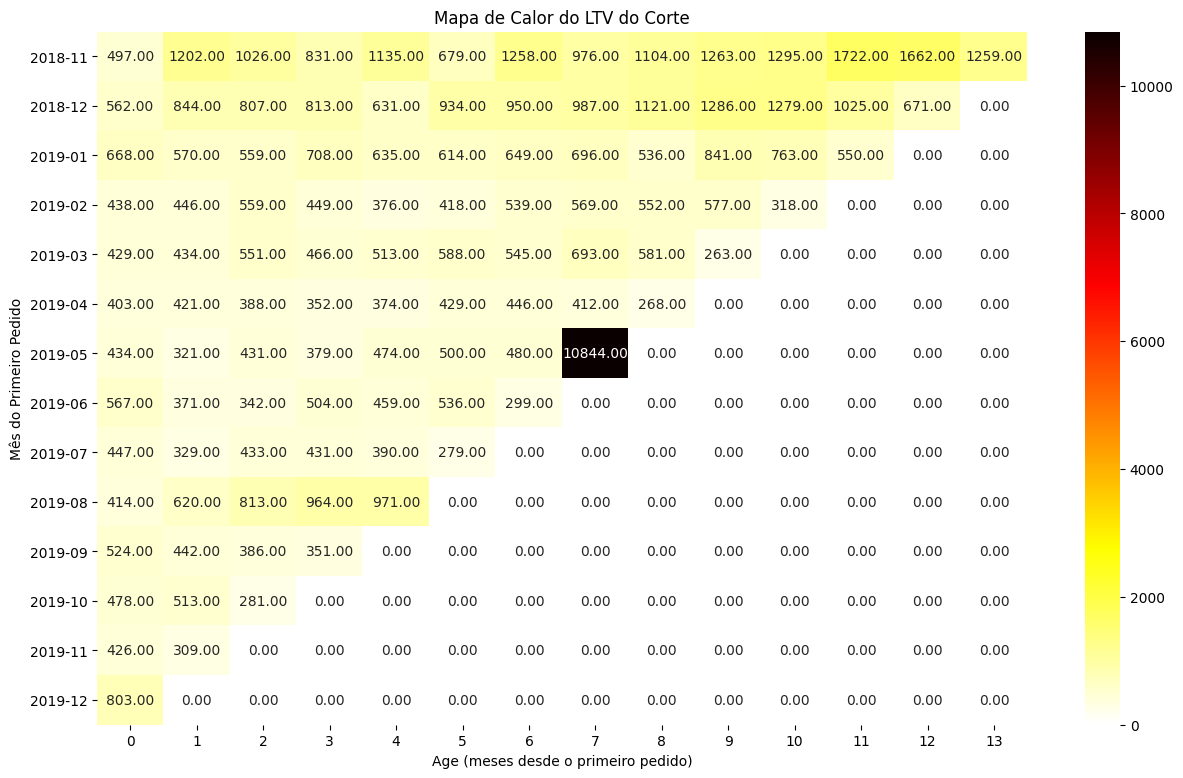

In [177]:
# Mapa  de Calor:
import seaborn as sns

plt.figure(figsize=(15, 9))
sns.heatmap(output, annot=True, fmt='.2f', cmap='hot_r')
plt.title('Mapa de Calor do LTV do Corte')
plt.xlabel('Age (meses desde o primeiro pedido)')
plt.ylabel('Mês do Primeiro Pedido')
plt.show()

#### Resposta do aluno:
*Podemos observar no mapa de calor os valores mais altos em tonalidades mais fortes, indicando o LTV maior em determinado mês,n nesse mapa podemos ver que alguns meses tivemos uma boa retenção dos clientes, e em momentos especificos uma grande alta.*

#### 4º Divisão de grupos com Clauster
   - Dividir os clientes em dois grupos conforme estudos acima, (Exemplo clientes mais recentes e clientes antigos) para ter uma ideia dos produtos de cada grupo, e receita de cada grupo, usando K-Means.- OK
   - Grafico de receita acumulada por grupo. - OK
   - Encontrar a significância estatística de ambos os grupos - OK

In [178]:
# Divisão de clientes:

#identificando o consumidor pelo perfil de compra:

def customer_func(dataframe, nivel): 
    resultado = (
        dataframe[dataframe['Nível'] == nivel]
        .groupby('description')
        .agg({'customerid': 'nunique', 'total_sales': 'sum'})
        .sort_values(by='total_sales', ascending=False)
    )
    return resultado

resultado_diamante = customer_func(ecommerce, 'Diamante')
print(resultado_diamante.head(3))

resultado_ouro = customer_func(ecommerce, 'Ouro')
print(resultado_ouro.head(3))

resultado_prata = customer_func(ecommerce, 'Prata')
print(resultado_prata.head(3))

resultado_bronze = customer_func(ecommerce, 'Bronze')
print(resultado_bronze.head(3))

resultado_latao = customer_func(ecommerce, 'Latão')
print(resultado_latao.head(3))

                                    customerid  total_sales
description                                                
paper craft , little birdie                  1    168469.60
white hanging heart t-light holder           4     17055.44
vintage union jack memoboard                 1     16592.08
                                customerid  total_sales
description                                            
medium ceramic top storage jar          15     78409.50
regency cakestand 3 tier                58     60920.85
jumbo bag red retrospot                 50     40216.92
                          customerid  total_sales
description                                      
regency cakestand 3 tier         307     45053.95
postage                          101     37779.89
party bunting                    254     30053.15
                                    customerid  total_sales
description                                                
regency cakestand 3 tier                   508    

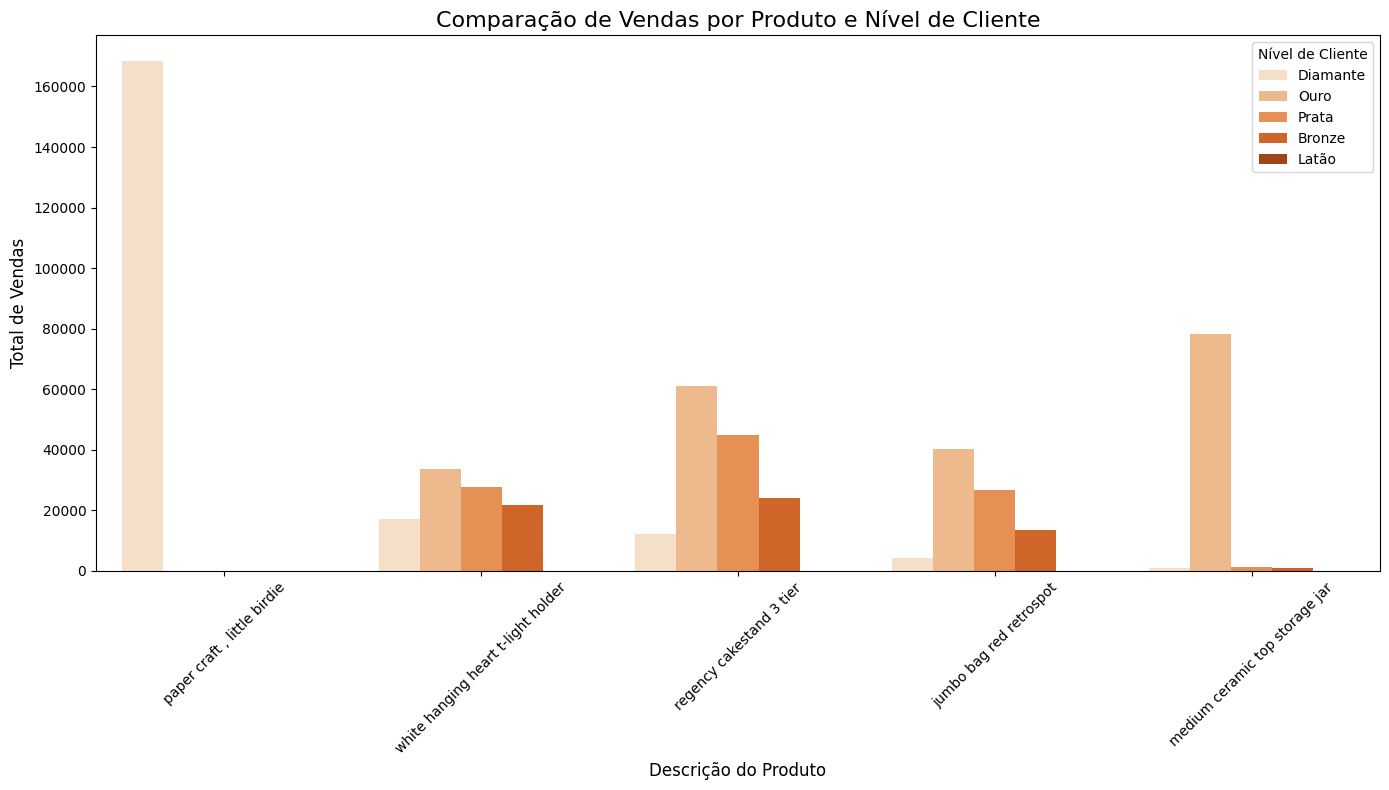

In [179]:
# Grafico para visualizar produtos em relação a classificação de cliente:

resultado_diamante['Nível'] = 'Diamante'
resultado_ouro['Nível'] = 'Ouro'
resultado_prata['Nível'] = 'Prata'
resultado_bronze['Nível'] = 'Bronze'
resultado_latao['Nível'] = 'Latão'

# Combinando os DataFrames
df_combined = pd.concat([resultado_diamante, resultado_ouro, resultado_prata, resultado_bronze, resultado_latao])
df_combined.reset_index(inplace=True)

# Filtrando os 5 produtos mais vendidos para visualização
top_products = df_combined.groupby('description')['total_sales'].sum().nlargest(5).index
df_filtered = df_combined[df_combined['description'].isin(top_products)]

# Grafico
plt.figure(figsize=(14, 8))
sns.barplot(data=df_filtered, x='description', y='total_sales', hue='Nível', palette='Oranges')
plt.title('Comparação de Vendas por Produto e Nível de Cliente', fontsize=16)
plt.xlabel('Descrição do Produto', fontsize=12)
plt.ylabel('Total de Vendas', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Nível de Cliente', fontsize=10)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Resposta do Aluno: Nesse gráfico podemos observar os principais produtos que representam a maior receita no período estudado, juntamente com os clientes que compraram, vemos que para estes produtos os grupos de clientes estão bem divididos, com excessão do paper craft., que apenas um cliente categorizado como diamente realizou a compra do mesmo, e em grande escala, não considero esse produto como outlier, visto que pelo tipo de produto e quantidade vendida, é possívelmente um revendedor ou algum usuário que está utilizando com finalidade profissional, inclusive esta informação é útil para averiguarmos o mesmo entender a usabilidade e estender a capilaridade de anúncios para toda a rede de clientes, assim aumentando as vendas. </b> <a class="tocSkip"></a>
</div>

In [208]:
# Análise Kmeans: criando 2 grupos cluster conforme solicitado com grupos divididos em 3 primeiros meses e 3 ultimos meses.

# importando bibliotecas
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extraindo data
ecommerce['year_month'] = ecommerce['invoicedate'].dt.to_period('M')

# Encontrando o primeiro e o último mês no DataFrame
first_month = ecommerce['year_month'].min()
last_month = ecommerce['year_month'].max()

# Filtrando os clientes dos três primeiros meses e últimos meses
first_three_months = ecommerce[ecommerce['year_month'] <= first_month + 2]
last_three_months = ecommerce[ecommerce['year_month'] >= last_month - 2]

# Juntando os dois DataFrames filtrados
df_filtered = pd.concat([first_three_months, last_three_months])

# "clientes 3 primeiros meses x 3 ultimos"
df_pivot = df_filtered.pivot_table(
    index='customerid', 
    columns='invoicedate', 
    values='total_sales', 
    aggfunc='sum', 
    fill_value=0
)

# Padronizando os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pivot)

# Aplicando o K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Adicionando os clusters ao DataFrame
df_pivot['Cluster'] = clusters

# Calculando a receita média por cluster (3 primeiros vs 3 últimos meses)
cluster_summary = df_pivot.groupby('Cluster').sum()

print(cluster_summary)


invoicedate  2018-11-29 08:26:00  2018-11-29 08:28:00  2018-11-29 08:34:00  \
Cluster                                                                      
0                         139.12                 22.2               348.78   
1                           0.00                  0.0                 0.00   

invoicedate  2018-11-29 08:35:00  2018-11-29 08:45:00  2018-11-29 09:00:00  \
Cluster                                                                      
0                          17.85               855.86                  204   
1                           0.00                 0.00                    0   

invoicedate  2018-11-29 09:01:00  2018-11-29 09:02:00  2018-11-29 09:09:00  \
Cluster                                                                      
0                           22.2               259.86                350.4   
1                            0.0                 0.00                  0.0   

invoicedate  2018-11-29 09:32:00  ...  2019-12-07 12:09:00  \

#### Resposta do Aluno:
*Como podemos ver o grupo cluster 0 foi muito superior em relação ao cluster 1*

In [209]:
#### Descobrindo a significancia estatistica de ambos os grupos clientes dos 3 primeiros meses e 3 ultimos meses:

# Importando a biblioteca stats
from scipy import stats

# Separando conjunto para comparação

lista_1 = first_three_months['total_sales_customer'].unique().tolist()
lista_2 = last_three_months['total_sales_customer'].unique().tolist()

# Teste t para comparar as médias entre os grupos nos dois períodos
# Teste t para os três primeiros meses

t_stat, p_val = stats.ttest_ind(lista_1, lista_2)

print(f'T-stat: {t_stat}')
print(f'P-value: {p_val}')

t_stat_last, p_val_last = stats.ttest_ind(lista_1, lista_2)
print(f'\nTeste t para os 3 últimos meses: t-statistic = {t_stat_last}, p-value = {p_val_last}')


T-stat: 2.9531166962401456
P-value: 0.003164636933955472

Teste t para os 3 últimos meses: t-statistic = 2.9531166962401456, p-value = 0.003164636933955472


#### Resposta do aluno:
*A diferença entre as médias dos clientes nos 3 primeiros meses e nos 3 últimos meses é estatisticamente significativa. Podemos observar que com essas informações, é possível sugerir que os padrões de consumo dos cliente mudaram entre os dois períodos.*

### Conclusão final:
#### Foi realizado uma análise completa no conjunto de dados, inclusive no decorrer da análise, foi possível observar que foi necessário modificar alguns pontos na decomposição do projeto, visto que ao olhar os dados, foi substituído algumas alternativas para um melhor processamento, e obtenção de informações, ou seja foi possível tirar informações importantes e insigths váliosos.  Podemos observar que a gama de consumidores é bem vasta, o segmento dos produtos também é bastante extensa, inclusive para entender melhor os consumidores, cada um foi classificado por sua frequência de compras, tambem foi classificado por categoria Diamente, Ouro, Prata, Bronze e Latão.. onde conseguimos observar o seu mix de produtos mais consumidos, as suas respectivas representações, e também particularidades, inclusive podemos observar que os consumidores mais bem rankeados não tem necessariamente a maior frequência, porém a quantidade de compra é maior, e como temos apenas a informação do código único, podemos deduzir ser um cliente de ticket médio alto, revendedor, etc.. o que podemos também aproveitar e definir uma politica de bonificação para o incentivo de compras para cada categoria, assim podendo estabelecer um melhor relacionamento, além de impulsionar as vendas, visto que se o cliente também poderá tornar a sua revenda mais competitiva. para os demais consumidores, uma politica que incentive a subir de nível, assim tambem usufruindo de descontos e bonificações, tambem foi possível observar um aumento nas vendas dos ultimos meses, mostrando uma maior retenção. para um próximo passo, e interessante analisar mais a fundo toda a categoria de produtos, para implementar aos clientes os produtos menos vendidos e mais baratos, podendo usar como brindes, incentivando o aumento no consumo.

### Link da Apresentação:

https://docs.google.com/presentation/d/1d22jGBVGVDj41pZZXErXC9IABqJrec9PzRcOC8_r-4Y/edit#slide=id.p